In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# Loading data
df = pd.read_csv('updated_passengers.csv')
df.head(5) 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India


# Booking Origin

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_18075/2008510760.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


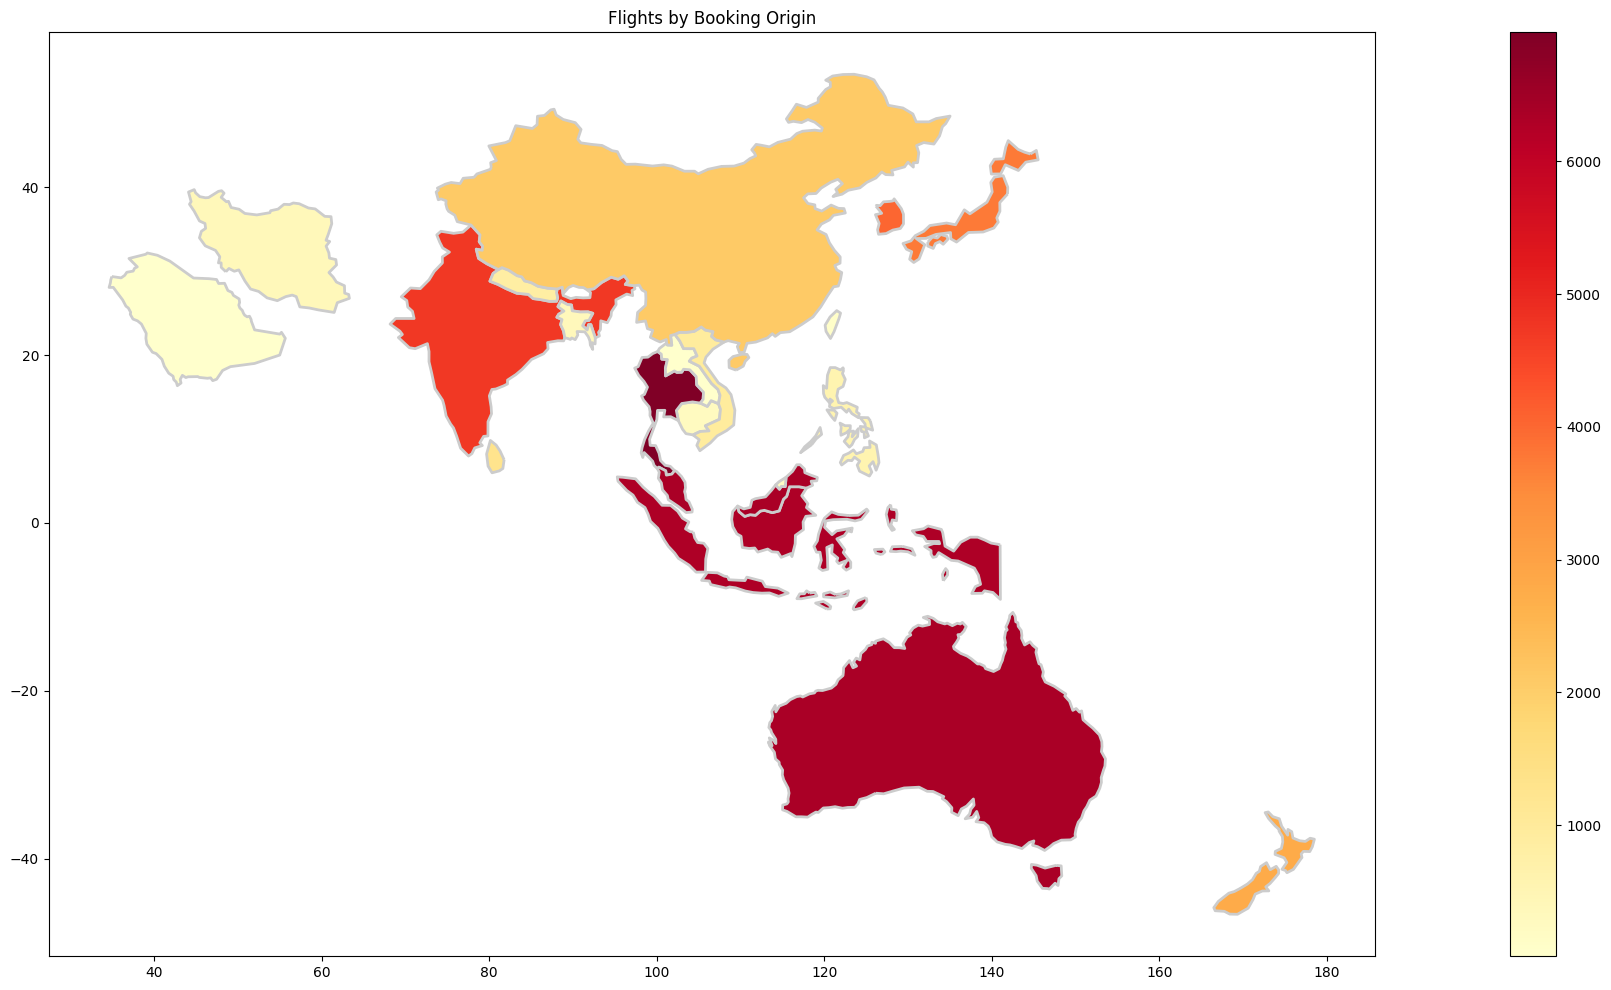

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_origin'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_origin', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Origin')

plt.show()

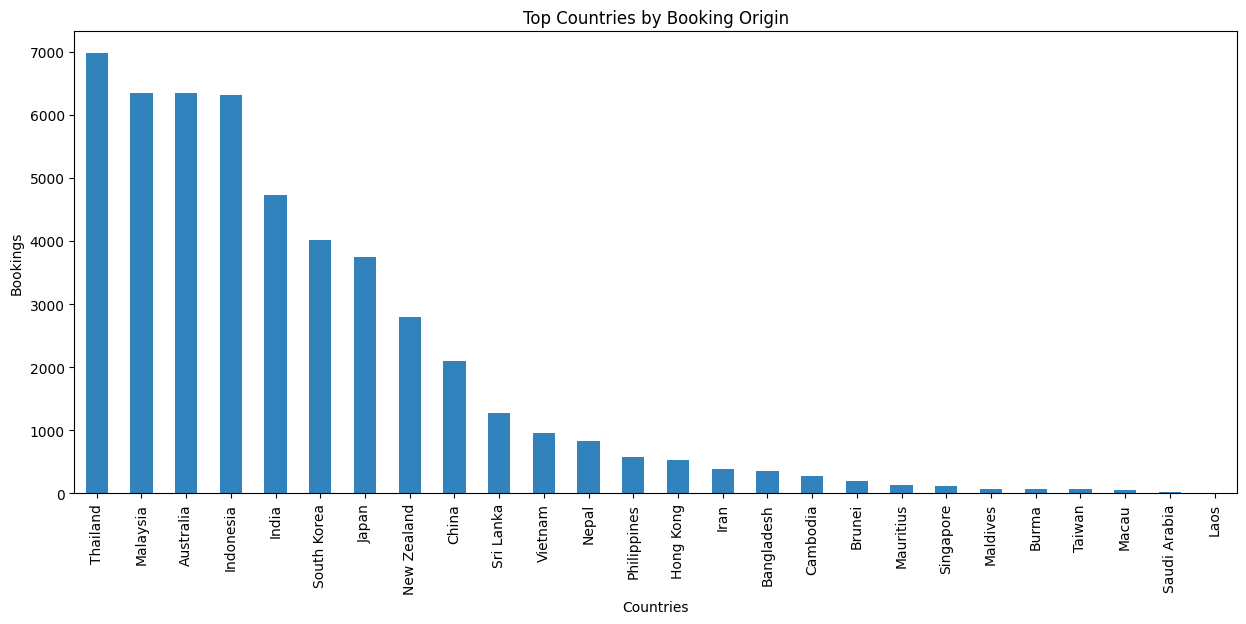

In [4]:
value_counts = df['booking_origin'].value_counts()

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top Countries by Booking Origin')

# Display the plot
plt.show()

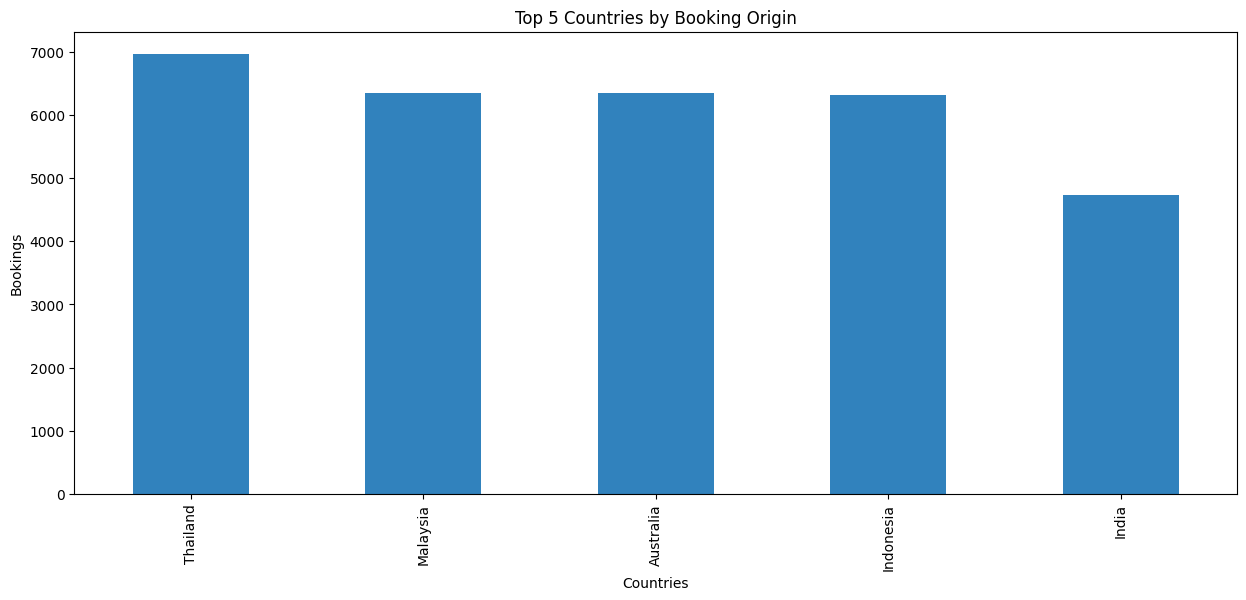

In [5]:
value_counts = df['booking_origin'].value_counts().head(5)

fig, ax = plt.subplots(figsize=(15, 6))
value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 5 Countries by Booking Origin')

# Display the plot
plt.show()

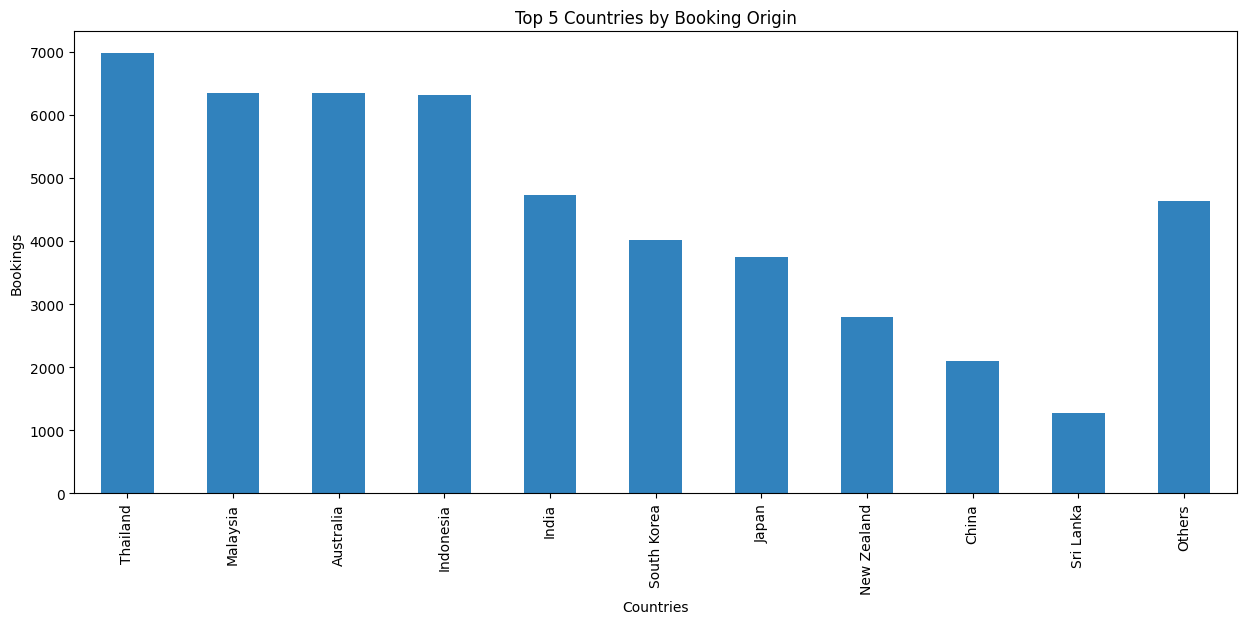

In [6]:
value_counts = df['booking_origin'].value_counts()

top_5_counts = value_counts.head(10)
other_count = value_counts[10:].sum()
new_value_counts = pd.concat([top_5_counts, pd.Series({'Others': other_count})])

fig, ax = plt.subplots(figsize=(15, 6))
new_value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 5 Countries by Booking Origin')

plt.show()

# Booking Destination

/var/folders/c6/j_vv349941d370ftdw7xkzkw0000gn/T/ipykernel_18075/3880249623.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


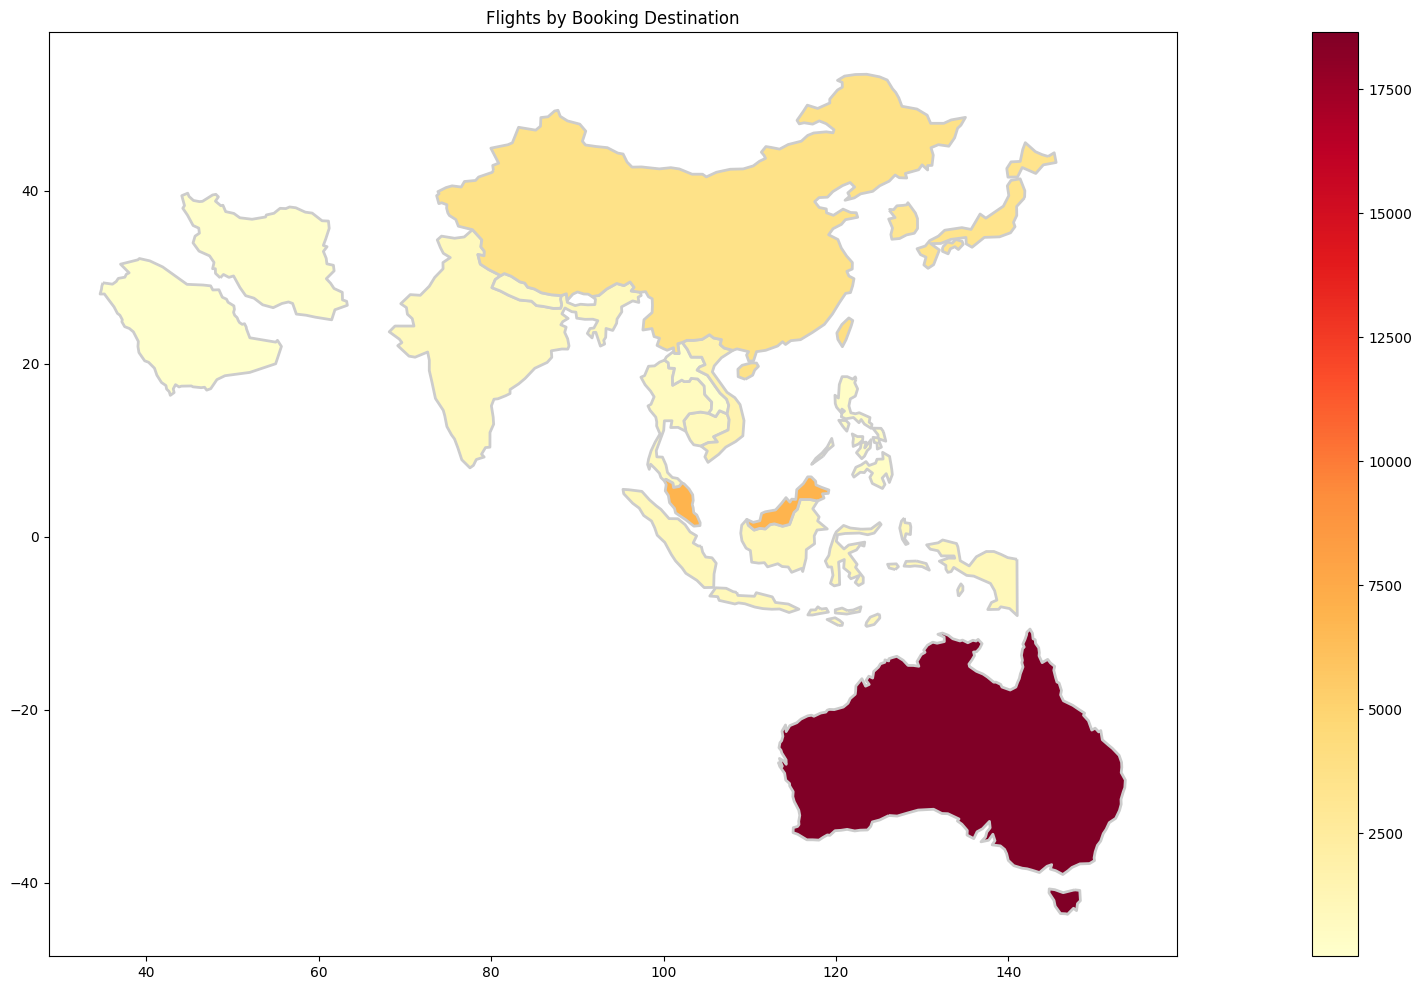

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

value_counts = df['booking_destination'].value_counts()

world = world.merge(value_counts, left_on='name', right_index=True)

fig, ax = plt.subplots(figsize=(35, 12))
world.plot(column='booking_destination', cmap='YlOrRd', linewidth=2, ax=ax, edgecolor='0.8', legend=True)

ax.set_title('Flights by Booking Destination')

plt.show()

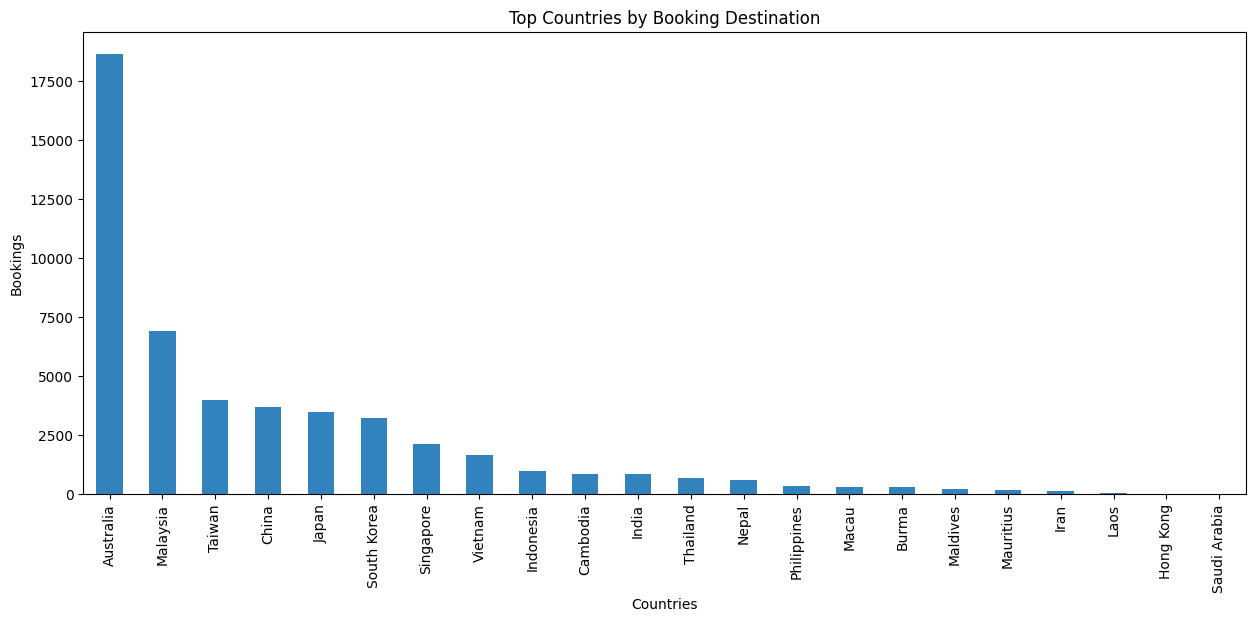

In [8]:
value_counts = df['booking_destination'].value_counts()

fig, ax = plt.subplots(figsize=(15, 6))

value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top Countries by Booking Destination')

# Display the plot
plt.show()

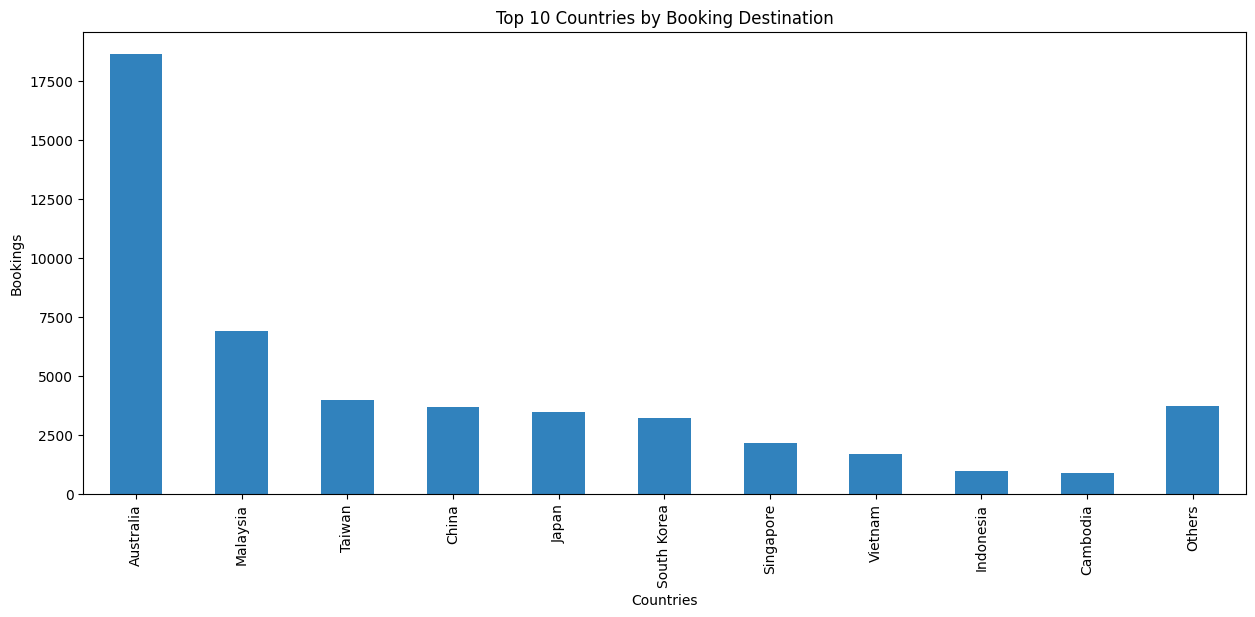

In [9]:
value_counts = df['booking_destination'].value_counts()

top_5_counts = value_counts.head(10)
other_count = value_counts[10:].sum()
new_value_counts = pd.concat([top_5_counts, pd.Series({'Others': other_count})])

fig, ax = plt.subplots(figsize=(15, 6))
new_value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Countries by Booking Destination')

plt.show()

# Routes

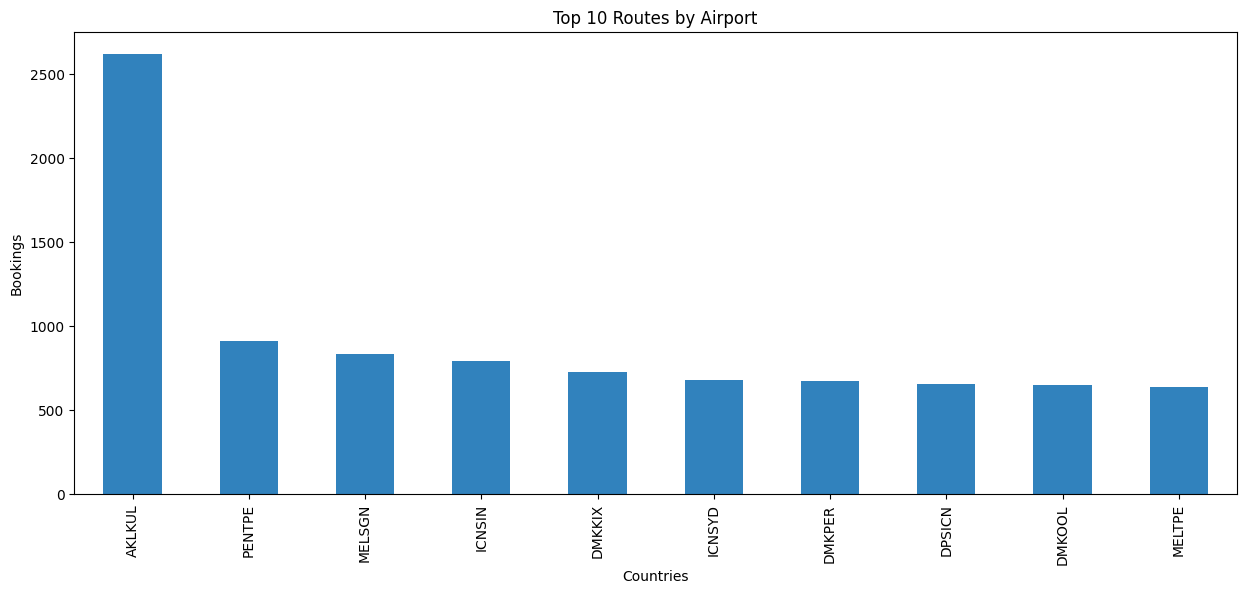

In [10]:
value_counts = df['route'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Routes by Airport')

# Display the plot
plt.show()

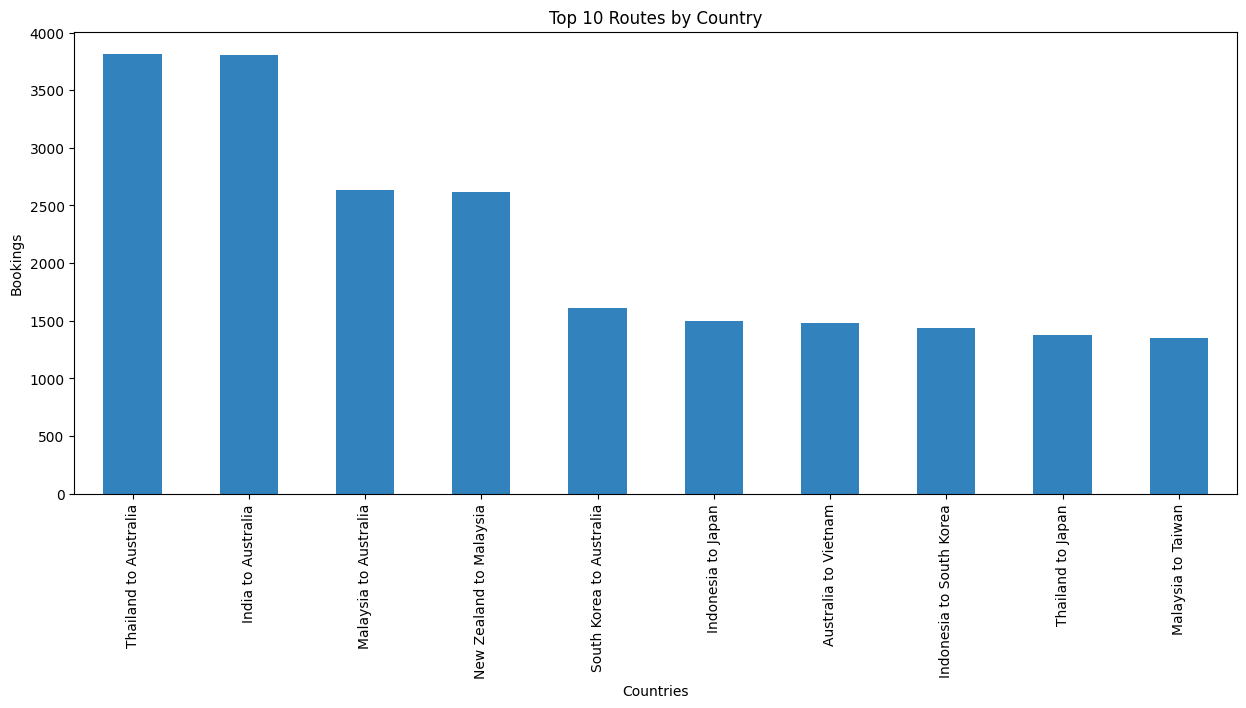

In [11]:
value_counts = df['country_route'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(15, 6))


value_counts.plot.bar(colormap='tab20c', ax=ax)

plt.xlabel('Countries')
plt.ylabel('Bookings')
plt.title('Top 10 Routes by Country')

# Display the plot
plt.show()

# Additional Services

In [12]:
# Mapping of countries to regions
country_to_region = {
    "Australia": "Oceania",
    "New Zealand": "Oceania",
    "India": "South Asia",
    "United Kingdom": "Western Europe",
    "China": "East Asia",
    "South Korea": "East Asia",
    "Canada": "North America",
    "Japan": "East Asia",
    "Malaysia": "Southeast Asia",
    "Singapore": "Southeast Asia",
    "Switzerland": "Western Europe",
    "Germany": "Western Europe",
    "Indonesia": "Southeast Asia",
    "Czech Republic": "Eastern Europe",
    "Vietnam": "Southeast Asia",
    "Thailand": "Southeast Asia",
    "Spain": "Southern Europe",
    "Romania": "Eastern Europe",
    "Ireland": "Western Europe",
    "Italy": "Southern Europe",
    "Slovakia": "Eastern Europe",
    "United Arab Emirates": "Middle East",
    "Tonga": "Oceania",
    "Réunion": "Eastern Africa",
    "(not set)": "Not specified",
    "Saudi Arabia": "Middle East",
    "Netherlands": "Western Europe",
    "Qatar": "Middle East",
    "Hong Kong": "East Asia",
    "Philippines": "Southeast Asia",
    "Sri Lanka": "South Asia",
    "France": "Western Europe",
    "Croatia": "Southeast Europe",
    "United States": "North America",
    "Laos": "Southeast Asia",
    "Hungary": "Eastern Europe",
    "Portugal": "Southern Europe",
    "Cyprus": "Southern Europe",
    "Cambodia": "Southeast Asia",
    "Poland": "Eastern Europe",
    "Belgium": "Western Europe",
    "Oman": "Middle East",
    "Bangladesh": "South Asia",
    "Kazakhstan": "Central Asia",
    "Brazil": "South America",
    "Turkey": "Middle East",
    "Kenya": "Eastern Africa",
    "Taiwan": "East Asia",
    "Brunei": "Southeast Asia",
    "Chile": "South America",
    "Bulgaria": "Eastern Europe",
    "Ukraine": "Eastern Europe",
    "Denmark": "Northern Europe",
    "Colombia": "South America",
    "Iran": "Middle East",
    "Bahrain": "Middle East",
    "Solomon Islands": "Oceania",
    "Slovenia": "Southeast Europe",
    "Mauritius": "Eastern Africa",
    "Nepal": "South Asia",
    "Russia": "Eastern Europe",
    "Kuwait": "Middle East",
    "Mexico": "North America",
    "Sweden": "Northern Europe",
    "Austria": "Western Europe",
    "Lebanon": "Middle East",
    "Jordan": "Middle East",
    "Greece": "Southern Europe",
    "Mongolia": "East Asia",
    "Tanzania": "Eastern Africa",
    "Peru": "South America",
    "Timor-Leste": "Southeast Asia",
    "Argentina": "South America",
    "New Caledonia": "Oceania",
    "Macau": "East Asia",
    "Myanmar (Burma)": "Southeast Asia",
    "Norway": "Northern Europe",
    "Panama": "North America",
    "Bhutan": "South Asia",
    "Norfolk Island": "Oceania",
    "Finland": "Northern Europe",
    "Nicaragua": "Central America",
    "Maldives": "South Asia",
    "Egypt": "Northern Africa",
    "Israel": "Middle East",
    "Tunisia": "Northern Africa",
    "South Africa": "Southern Africa",
    "Papua New Guinea": "Oceania",
    "Paraguay": "South America",
    "Estonia": "Eastern Europe",
    "Seychelles": "Eastern Africa",
    "Afghanistan": "South Asia",
    "Guam": "Oceania",
    "Czechia": "Eastern Europe",
    "Malta": "Southern Europe",
    "Vanuatu": "Oceania",
    "Belarus": "Eastern Europe",
    "Pakistan": "South Asia",
    "Iraq": "Middle East",
    "Ghana": "West Africa",
    "Gibraltar": "Southern Europe",
    "Guatemala": "Central America",
    "Algeria": "Northern Africa",
    "Svalbard & Jan Mayen": "Northern Europe"
}
df['region'] = df['booking_origin'].map(country_to_region)

df.head(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,booking_destination,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,origin,destination,country_route,region
0,1,Internet,RoundTrip,21,12,6,Tue,AKLHGH,New Zealand,China,0,0,0,7.21,1,AKL,HGH,New Zealand to China,Oceania
1,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,India,1,0,0,5.52,0,AKL,DEL,New Zealand to India,Oceania
2,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,India,0,0,0,5.52,0,AKL,DEL,New Zealand to India,Oceania
3,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,New Zealand,India,1,1,0,5.52,0,AKL,DEL,New Zealand to India,Oceania
4,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,India,0,0,1,5.52,0,AKL,DEL,New Zealand to India,Oceania


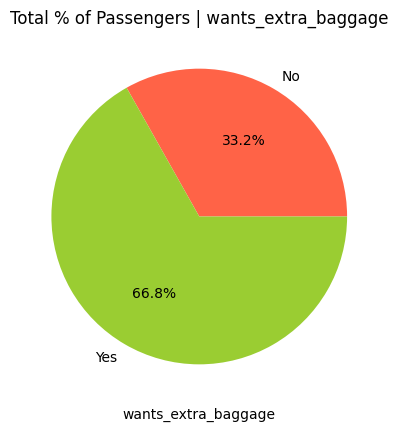

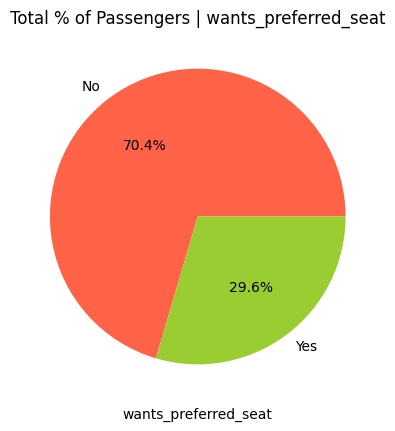

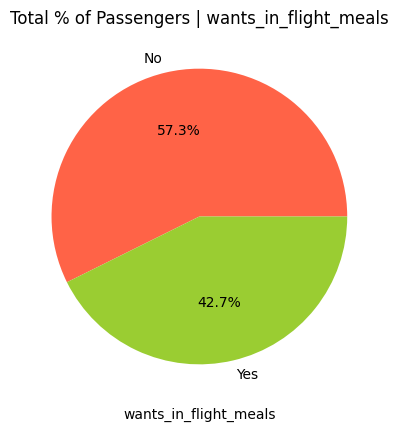

In [28]:
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

for service in services :
    count = df[service].value_counts().sort_index()
    #count.plot(kind='pie')
    plt.pie(count, labels=["No","Yes"], autopct='%1.1f%%',colors=["tomato","yellowgreen"])

    plt.xlabel(service)
    plt.title(f"Total % of Passengers | {service}")
    plt.show()

In [14]:
df['wants_in_flight_meals'].corr(df['flight_duration'])


0.15619665664987603

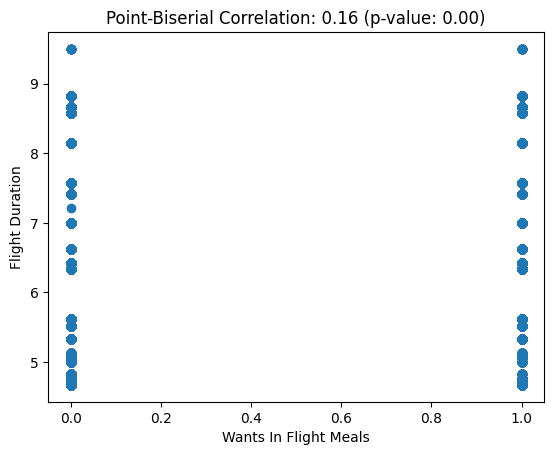

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(df['wants_in_flight_meals'], df['flight_duration'])

# Create a scatter plot of the data
plt.scatter(df['wants_in_flight_meals'], df['flight_duration'])

# Add labels and title
plt.xlabel('Wants In Flight Meals')
plt.ylabel('Flight Duration')
plt.title(f'Flight Duration vs Wanting In Flight Meals Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

#weak correlation
#can also be explained bc the min flight length is 4 hrs, which is relatively long. it might have more correlation if we could compare to flights shorter in length (1-2 hrs)
#https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php

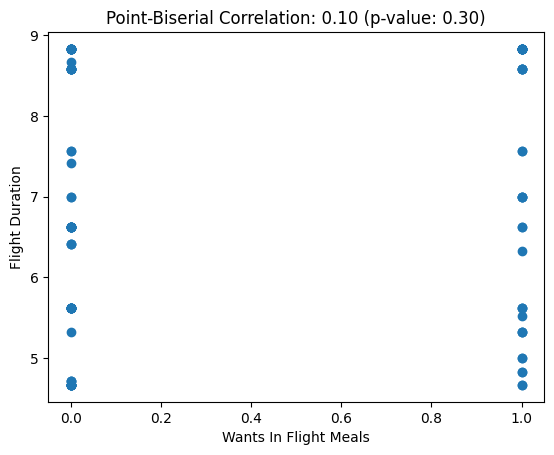

In [53]:
# Wants in flight meal vs flight duration (outliers removed)

sample_size = 100  # Define the desired sample size
sampled_df = df.sample(n=sample_size)  # Randomly select a subset of data points

a = sampled_df['wants_in_flight_meals']
b = sampled_df['flight_duration']

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(a, b)

# Define the outlier threshold (e.g., using z-scores)
z_score_threshold = 2

# Calculate the z-scores for the continuous variable
z_scores = (b - np.mean(b)) / np.std(b)

# Filter outliers based on the z-score threshold
filtered_a = a[abs(z_scores) <= z_score_threshold]
filtered_b = b[abs(z_scores) <= z_score_threshold]

# Create a scatter plot of the filtered data
plt.scatter(filtered_a, filtered_b)

# Add labels and title
plt.xlabel('Wants In Flight Meals')
plt.ylabel('Flight Duration')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

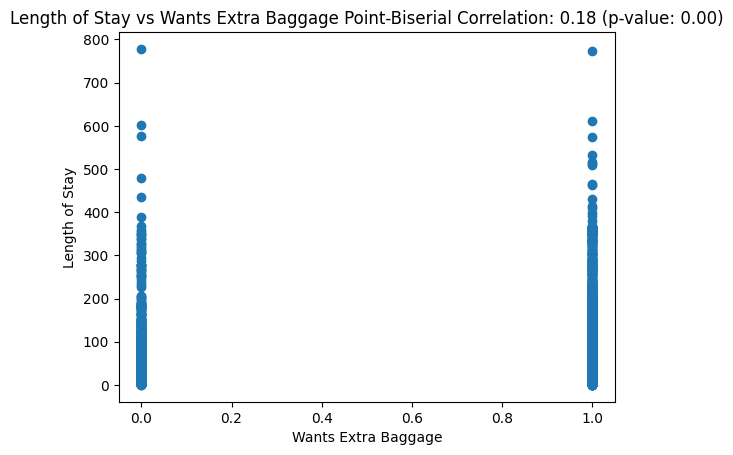

In [45]:
correlation_coefficient, p_value = stats.pointbiserialr(df['wants_extra_baggage'], df['length_of_stay'])

# Create a scatter plot of the data
plt.scatter(df['wants_extra_baggage'], df['length_of_stay'])

# Add labels and title
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Length of Stay')
plt.title(f'Length of Stay vs Wants Extra Baggage Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

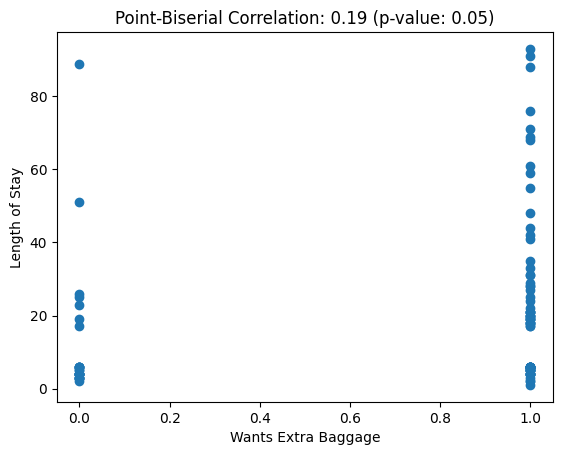

In [50]:
# Wants extra baggage vs length of stay (outliers removed)
#a = df['wants_extra_baggage']
#b = df['length_of_stay']

sample_size = 100  # Define the desired sample size
sampled_df = df.sample(n=sample_size)  # Randomly select a subset of data points

a = sampled_df['wants_extra_baggage']
b = sampled_df['length_of_stay']

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(a, b)

# Define the outlier threshold (e.g., using z-scores)
z_score_threshold = 2

# Calculate the z-scores for the continuous variable
z_scores = (b - np.mean(b)) / np.std(b)

# Filter outliers based on the z-score threshold
filtered_a = a[abs(z_scores) <= z_score_threshold]
filtered_b = b[abs(z_scores) <= z_score_threshold]

# Create a scatter plot of the filtered data
plt.scatter(filtered_a, filtered_b)

# Add labels and title
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Length of Stay')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

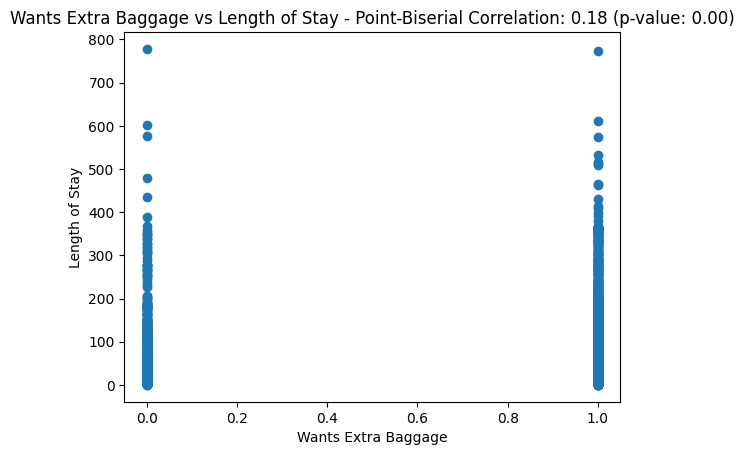

In [59]:
# Wants extra baggage vs length of stay (outliers removed)
a = df['wants_extra_baggage']
b = df['length_of_stay']

#sample_size = 100  # Define the desired sample size
#sampled_df = df.sample(n=sample_size)  # Randomly select a subset of data points

#a = sampled_df['wants_extra_baggage']
#b = sampled_df['length_of_stay']

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(a, b)


# Create a scatter plot of the filtered data
plt.scatter(a,b)

# Add labels and title
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Length of Stay')
plt.title(f'Wants Extra Baggage vs Length of Stay - Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')

# Display the plot
plt.show()

Text(0.5, 1.0, 'Point-Biserial Correlation: 0.03 (p-value: 0.79)')

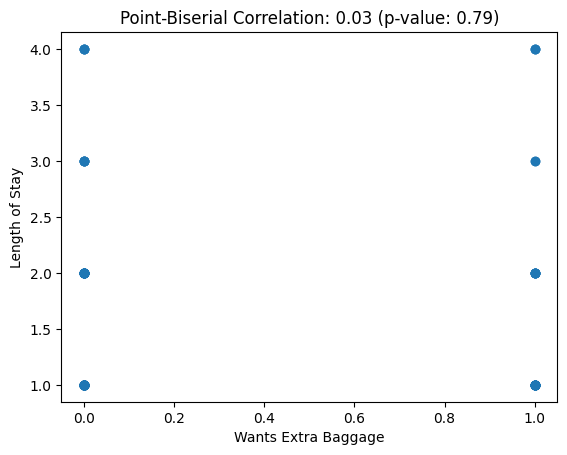

In [61]:
sample_size = 100  # Define the desired sample size
sampled_df = df.sample(n=sample_size)  # Randomly select a subset of data points

a = sampled_df['wants_preferred_seat']
b = sampled_df['num_passengers']

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(a, b)

# Define the outlier threshold (e.g., using z-scores)
z_score_threshold = 2

# Calculate the z-scores for the continuous variable
z_scores = (b - np.mean(b)) / np.std(b)

# Filter outliers based on the z-score threshold
filtered_a = a[abs(z_scores) <= z_score_threshold]
filtered_b = b[abs(z_scores) <= z_score_threshold]

# Create a scatter plot of the filtered data
plt.scatter(filtered_a, filtered_b)

# Add labels and title
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Length of Stay')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')


Text(0.5, 1.0, 'Point-Biserial Correlation: 0.03 (p-value: 0.00)')

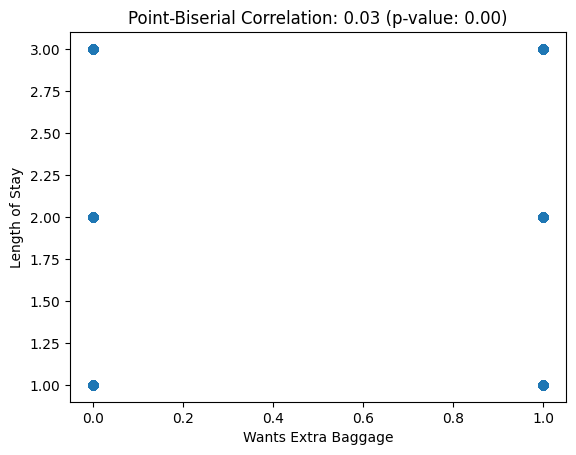

In [66]:
sample_size = 100  # Define the desired sample size
sampled_df = df.sample(n=sample_size)  # Randomly select a subset of data points



#a = sampled_df['wants_preferred_seat']
#b = sampled_df['num_passengers']

a = df['wants_preferred_seat']
b = df['num_passengers']

# Calculate the point-biserial correlation
correlation_coefficient, p_value = stats.pointbiserialr(a, b)

# Define the outlier threshold (e.g., using z-scores)
z_score_threshold = 2

# Calculate the z-scores for the continuous variable
z_scores = (b - np.mean(b)) / np.std(b)

# Filter outliers based on the z-score threshold
filtered_a = a[abs(z_scores) <= z_score_threshold]
filtered_b = b[abs(z_scores) <= z_score_threshold]

# Create a scatter plot of the filtered data
plt.scatter(filtered_a, filtered_b)

# Add labels and title
plt.xlabel('Wants Extra Baggage')
plt.ylabel('Length of Stay')
plt.title(f'Point-Biserial Correlation: {correlation_coefficient:.2f} (p-value: {p_value:.2f})')


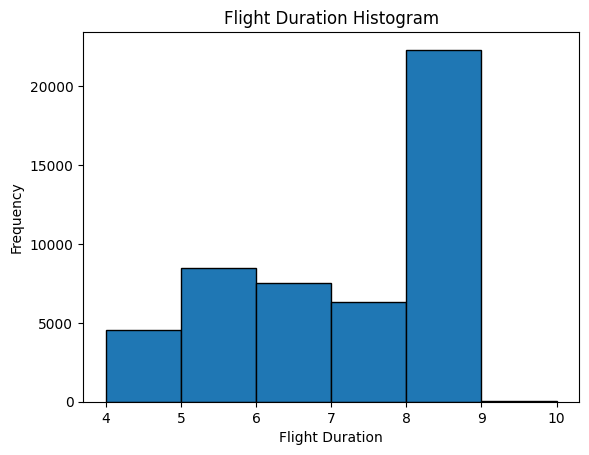

In [27]:
bin_edges = range(int(min(df['flight_duration'])), int(max(df['flight_duration']))+2)
plt.hist(df['flight_duration'], bins=bin_edges, edgecolor='black')

plt.xlabel('Flight Duration')
plt.ylabel('Frequency')
plt.title('Flight Duration Histogram')

# Display the histogram
plt.show()

## By Region

In [30]:
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

for service in services :
    count = df.groupby(['region',service]).size().reset_index()
    #count = df['region'][service].value_counts().sort_index()
    #count.plot(kind='pie')
    #plt.pie(count, labels=["No","Yes"], autopct='%1.1f%%',colors=["tomato","yellowgreen"])
    plt.bar()

    plt.xlabel(service)
    plt.title(f'{service} by Region')
    plt.show()

TypeError: bar() missing 2 required positional arguments: 'x' and 'height'

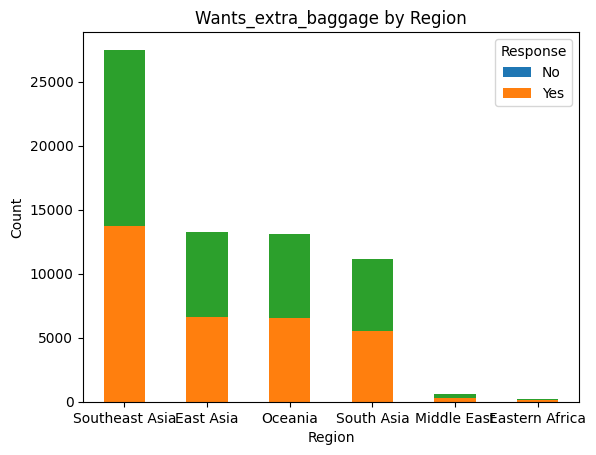

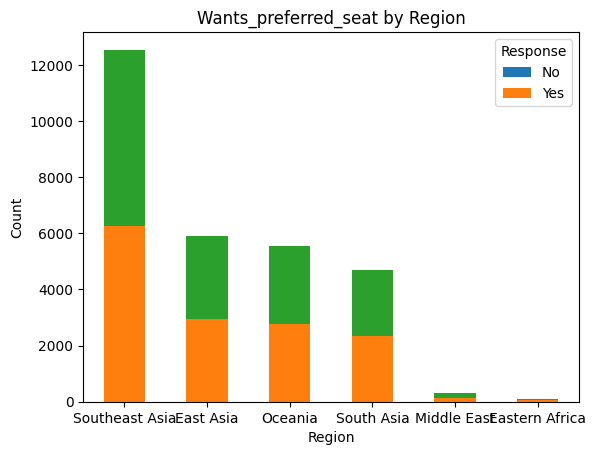

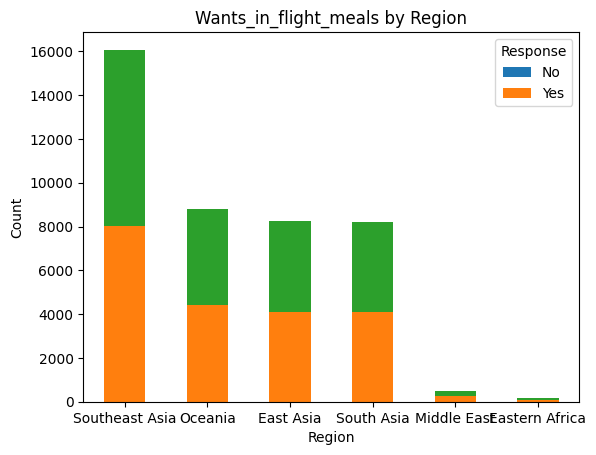

In [33]:

services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

for service in services:
    count = df.groupby(['region', service])[service].sum().unstack().fillna(0)
    count['Total'] = count.sum(axis=1)
    count = count.sort_values(by='Total', ascending=False)
    
    # Plotting the bar graph
    count.plot(kind='bar', stacked=True)
    
    # Add labels and title
    plt.xlabel('Region')
    plt.ylabel('Count')
    plt.title(f'{service.capitalize()} by Region')
    plt.legend(title='Response', labels=['No', 'Yes'])
    plt.xticks(rotation=0)
    
    plt.show()


KeyError: 'No'

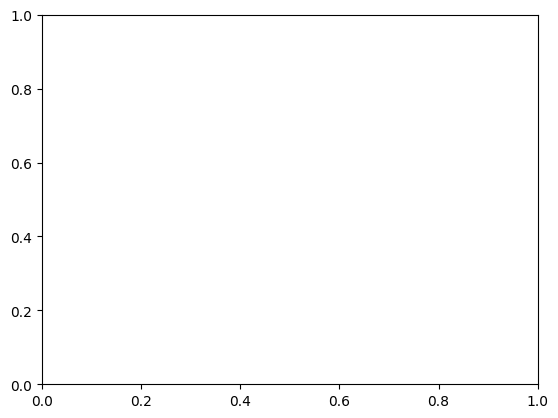

In [38]:
services = ['wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals']

for service in services:
    count = df.groupby(['region', service])[service].sum().unstack().fillna(0)
    count['Total'] = count.sum(axis=1)
    count = count.sort_values(by='Total', ascending=False)
    
    # Calculate the percentage for each category
    percentages = count.div(count['Total'], axis=0) * 100
    
    # Plotting the bar graph
    regions = count.index
    width = 0.35
    x = np.arange(len(regions))
    
    fig, ax = plt.subplots()
    ax.bar(x - width/2, percentages['No'], width, label='No')
    ax.bar(x + width/2, percentages['Yes'], width, label='Yes')
    
    # Add percentage labels to each bar
    for i, val in enumerate(percentages.index):
        ax.annotate(f'{percentages.loc[val, "No"]:.1f}%', xy=(x[i] - width/2, percentages.loc[val, "No"] + 2), ha='center')
        ax.annotate(f'{percentages.loc[val, "Yes"]:.1f}%', xy=(x[i] + width/2, percentages.loc[val, "Yes"] + 2), ha='center')
    
    # Add labels and title
    ax.set_xlabel('Region')
    ax.set_ylabel('Percentage')
    ax.set_title(f'{service.capitalize()} by Region')
    ax.set_xticks(x)
    ax.set_xticklabels(regions)
    ax.legend()
    
    plt.show()
